In [1]:
import pandas as pd
d=pd.read_csv('/content/car data.csv')
print(d)

    Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Selling_type Transmission  Owner  
0         Dealer       Manual      0  
1         Dealer       Manual    

In [2]:
d['Fuel_Type']=d['Fuel_Type'].map({'Petrol':0,'Diesel':1,'CNG':2})
d['Transmission']=d['Transmission'].map({'Manual':0,'Automatic':1})
d['Selling_type']=d['Selling_type'].map({'Dealer':0,'Individual':1})
d.dropna()
print(d)

    Car_Name  Year  Selling_Price  Present_Price  Driven_kms  Fuel_Type  \
0       ritz  2014           3.35           5.59       27000          0   
1        sx4  2013           4.75           9.54       43000          1   
2       ciaz  2017           7.25           9.85        6900          0   
3    wagon r  2011           2.85           4.15        5200          0   
4      swift  2014           4.60           6.87       42450          1   
..       ...   ...            ...            ...         ...        ...   
296     city  2016           9.50          11.60       33988          1   
297     brio  2015           4.00           5.90       60000          0   
298     city  2009           3.35          11.00       87934          0   
299     city  2017          11.50          12.50        9000          1   
300     brio  2016           5.30           5.90        5464          0   

     Selling_type  Transmission  Owner  
0               0             0      0  
1               0

In [3]:
y=d['Selling_type']
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
296    0
297    0
298    0
299    0
300    0
Name: Selling_type, Length: 301, dtype: int64


In [4]:
x = d.drop(['Selling_type','Transmission','Car_Name'], axis=1)
print(x)

     Year  Selling_Price  Present_Price  Driven_kms  Fuel_Type  Owner
0    2014           3.35           5.59       27000          0      0
1    2013           4.75           9.54       43000          1      0
2    2017           7.25           9.85        6900          0      0
3    2011           2.85           4.15        5200          0      0
4    2014           4.60           6.87       42450          1      0
..    ...            ...            ...         ...        ...    ...
296  2016           9.50          11.60       33988          1      0
297  2015           4.00           5.90       60000          0      0
298  2009           3.35          11.00       87934          0      0
299  2017          11.50          12.50        9000          1      0
300  2016           5.30           5.90        5464          0      0

[301 rows x 6 columns]


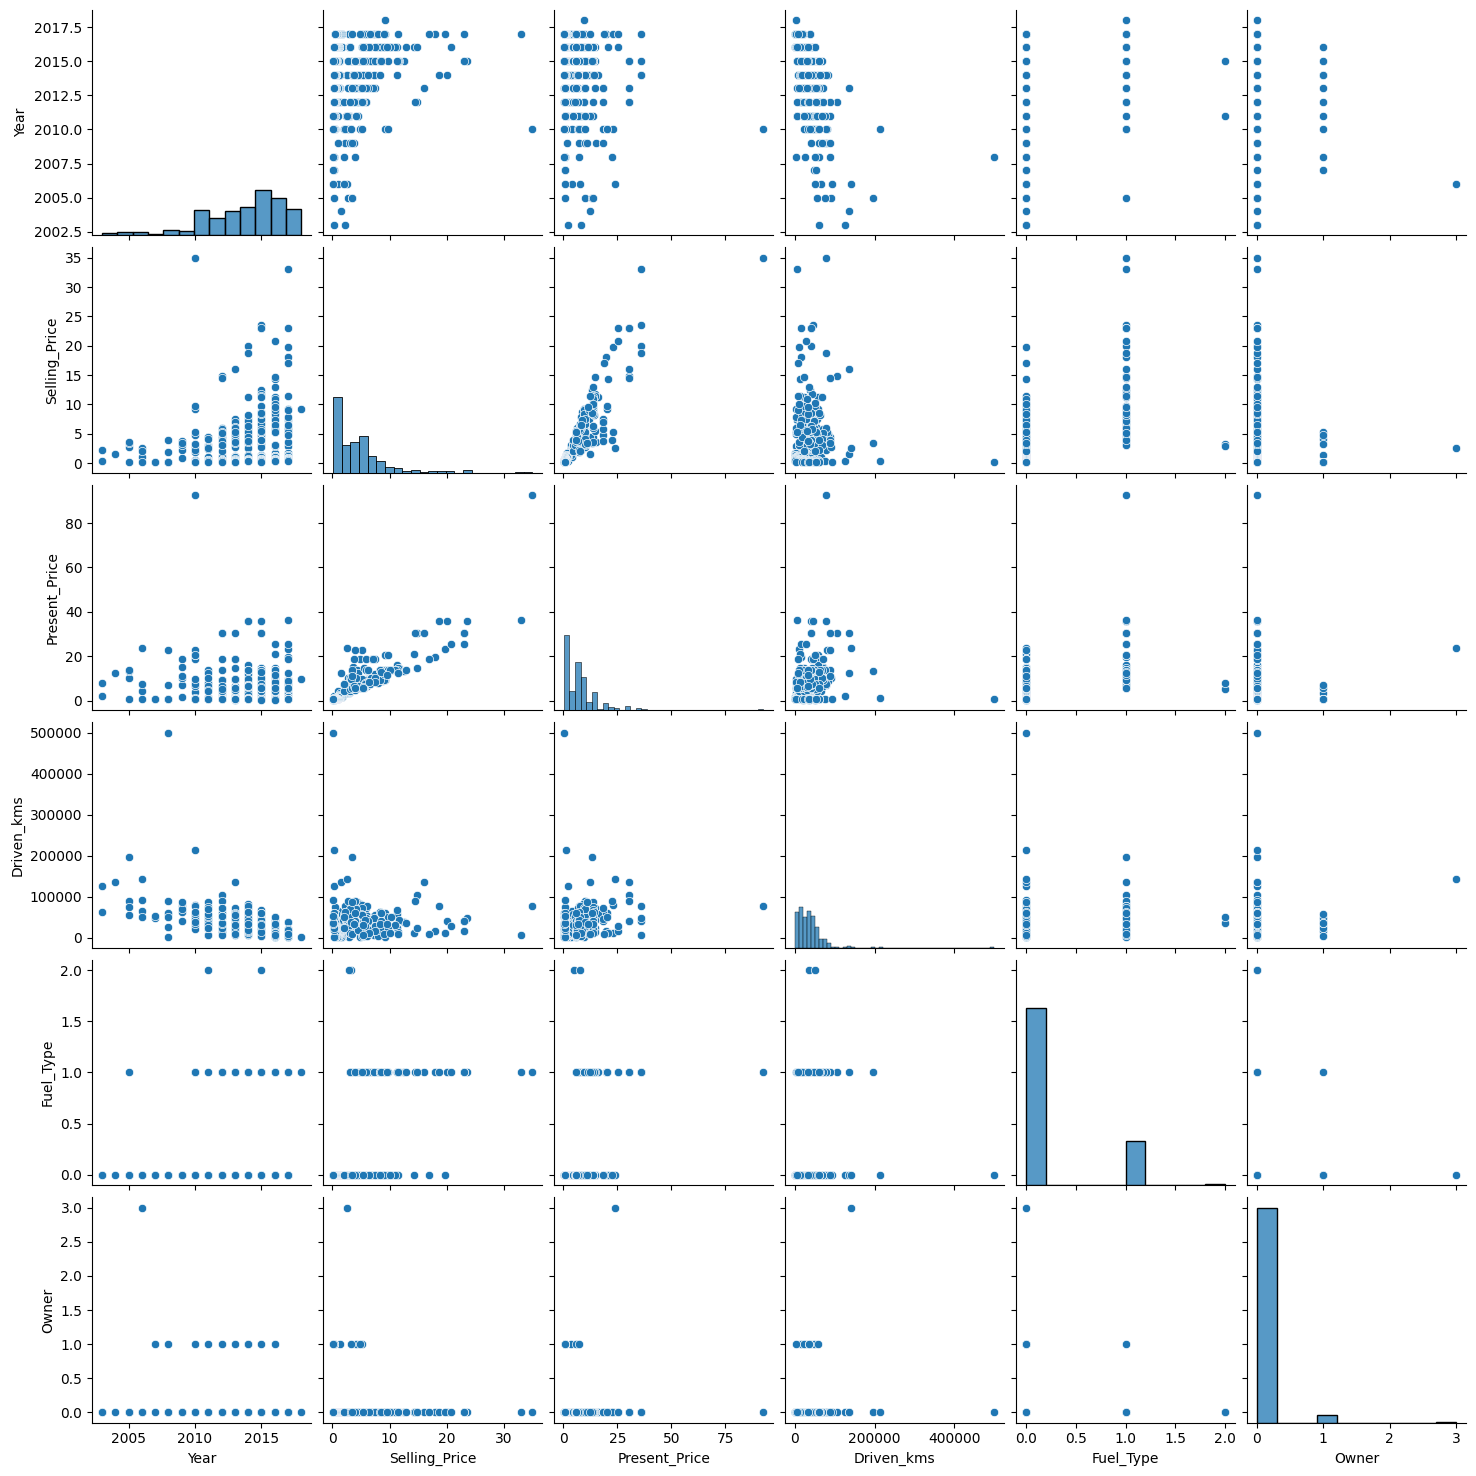

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(x)
plt.show()

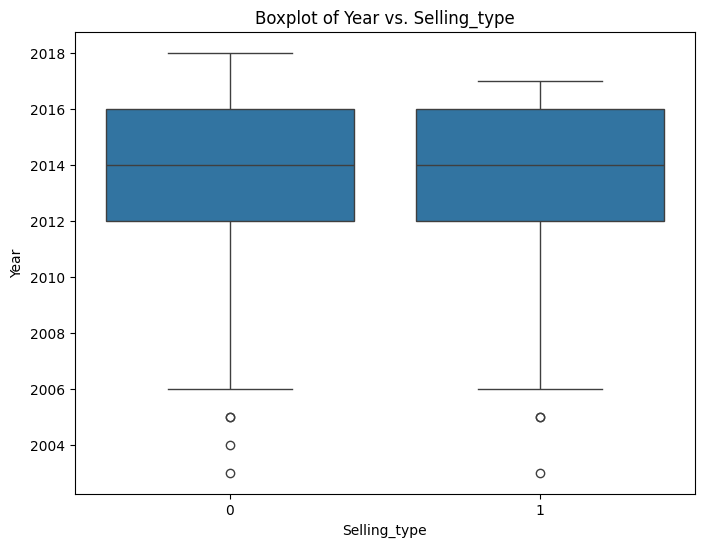

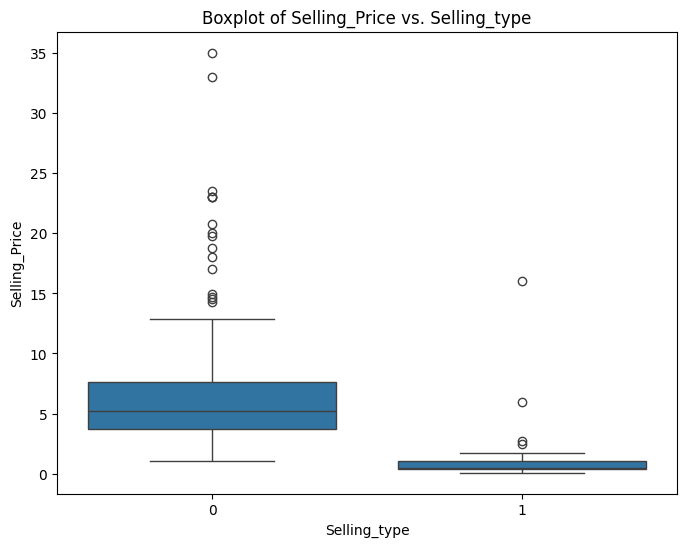

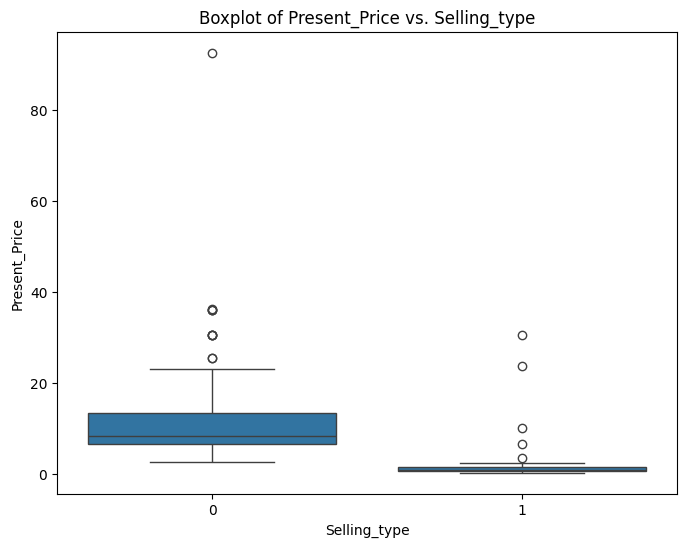

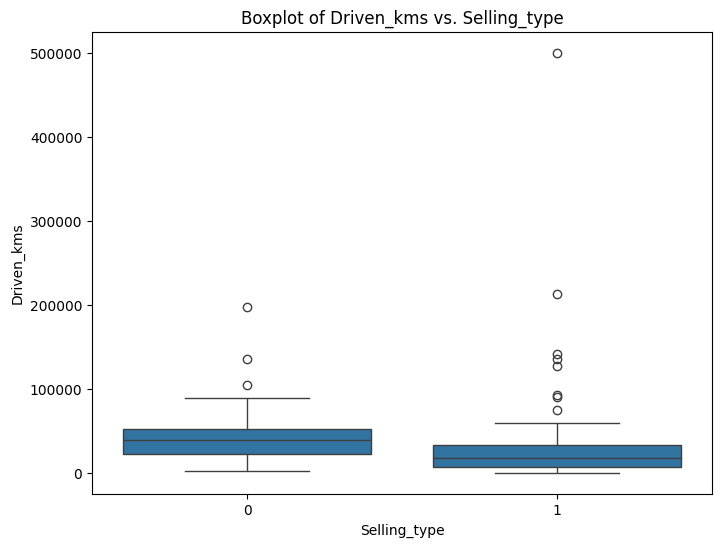

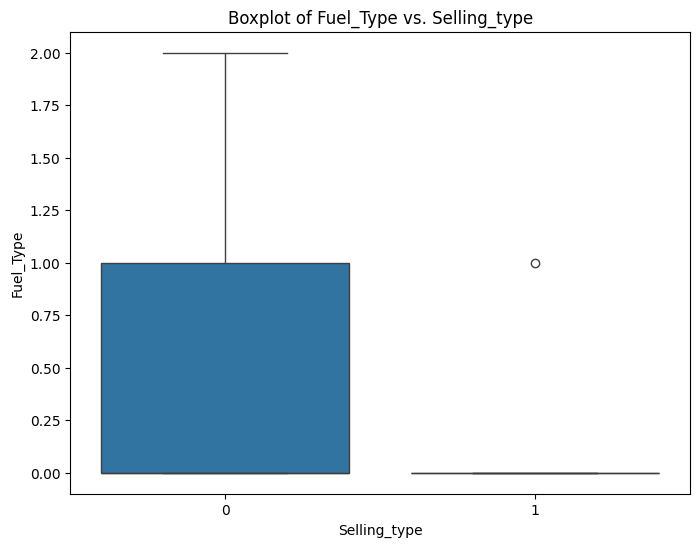

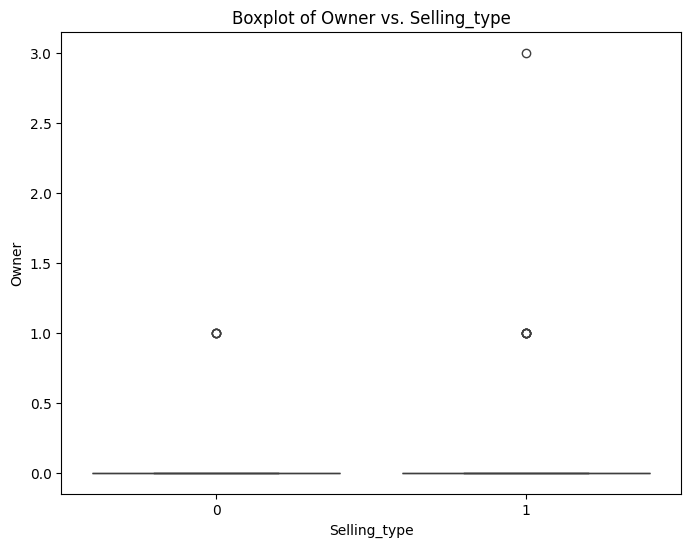

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
x_subset = x.iloc[:, :10]
for column in x_subset.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=y, y=x_subset[column])
    plt.title(f'Boxplot of {column} vs. Selling_type')
    plt.show()

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.9836065573770492


In [9]:
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(y_test,y_pred)
print("confusion matrix:")
print(confusion)

confusion matrix:
[[40  1]
 [ 0 20]]


In [10]:
from sklearn.metrics  import classification_report
report=classification_report(y_test,y_pred)
print("classification report:")
print(report)

classification report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        41
           1       0.95      1.00      0.98        20

    accuracy                           0.98        61
   macro avg       0.98      0.99      0.98        61
weighted avg       0.98      0.98      0.98        61



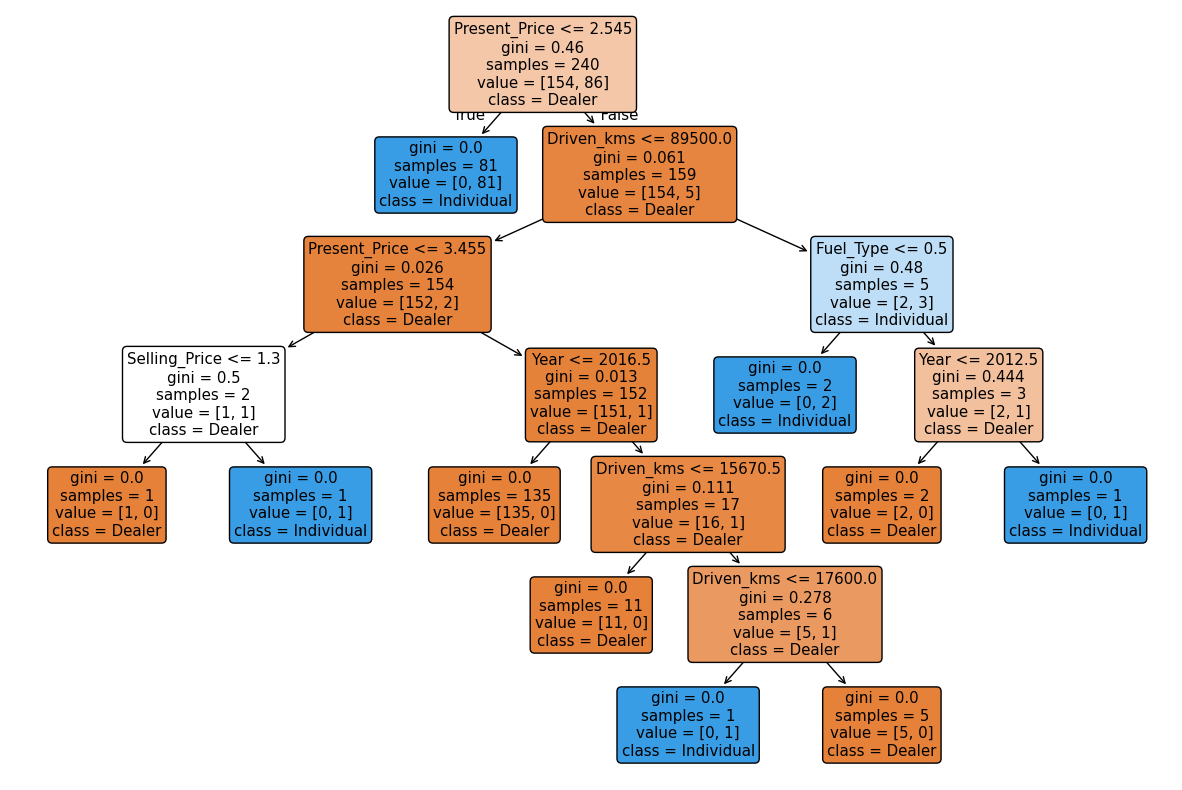

In [11]:
from sklearn.tree import plot_tree, export_graphviz
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plot_tree(model,
          filled=True,
          rounded=True,
          class_names=['Dealer', 'Individual'],
          feature_names=x.columns)
plt.show()

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid_search.fit(x_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Estimator:", grid_search.best_estimator_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.646 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.646 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.646 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.646 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.646 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.646 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.646 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.646 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)
confusion = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(confusion)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        41
           1       0.95      1.00      0.98        20

    accuracy                           0.98        61
   macro avg       0.98      0.99      0.98        61
weighted avg       0.98      0.98      0.98        61


Confusion Matrix:
[[40  1]
 [ 0 20]]


In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Predicted Values:", y_pred)

Predicted Values: [1 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0
 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1]
